In [1]:
# import packages
import numpy as np
import pandas as pd
import os
import seaborn as sns
import Bio
import matplotlib.pyplot as plt

In [2]:
# import data 

path: str = './data/' #folder where files are stored
prokaryotes: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_unique_prot.csv"), dtype=str)   
prokaryotes_all: pd.DataFrame = pd.read_csv(os.path.join(path, "prokaryotes_all.csv"), dtype=str)

In [ ]:
#Group unique GO terms

prokaryotes['Gene Ontology (biological process)_new'] = prokaryotes['Gene Ontology (biological process)'].str.split(';').str[0]
GO_groups = prokaryotes.groupby('Gene Ontology (biological process)_new')
GO_keys = list(GO_groups.groups.keys())
#GO_groups.get_group(GO_keys[6])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/var/folders/h6/x5s86vbj0n703

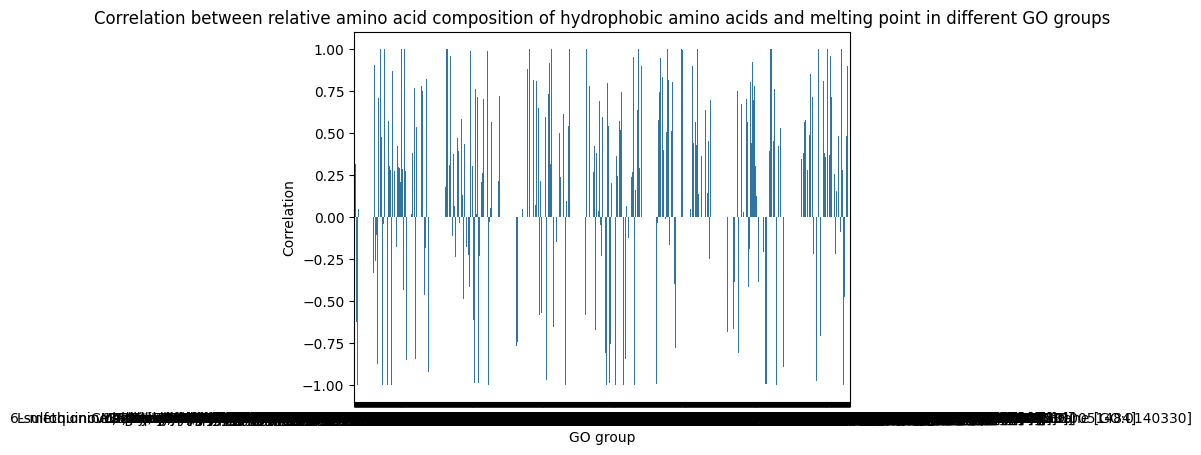

In [4]:
def rel_aa_comp(Sequence:str, AA_property:str) -> list: 
    count = 0
    for element in Sequence:  
        if element in AA_property:
            count += 1
    return count/len(Sequence)

AA_hydrophobic:list = ['A', 'V', 'I', 'L', 'M', 'F', 'W', ]
AA_polar_neutral:list = ['N', 'Q', 'S', 'T', 'Y']
AA_acidic:list = ['D', 'E']
AA_basic:list = ['R', 'H', 'K']
AA_list:list = ['A', 'V', 'I', 'L', 'M', 'F', 'W','N', 'Q', 'S', 'T', 'Y','D', 'E','R', 'H', 'K', 'C', 'P', 'G' ]

prokaryotes['hydrophobic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_hydrophobic)) # calculates relative amino acid composition of hydrophobic amino acids
prokaryotes['polar_neutral'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_polar_neutral)) # calculates relative amino acid composition of polar neutral amino acids
prokaryotes['acidic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_acidic)) # calculates relative amino acid composition of acidic amino acids
prokaryotes['basic'] = prokaryotes['Sequence'].apply(lambda x: rel_aa_comp(x, AA_basic)) # calculates relative amino acid composition of basic amino acids

# calculate the correlation between the relative amino acid composition and the melting point in each GO group:
correlation_hydrophobic = GO_groups.apply(lambda x: x['meltPoint'].corr(x['hydrophobic']))
correlation_polar_neutral = GO_groups.apply(lambda x: x['meltPoint'].corr(x['polar_neutral']))
correlation_acidic = GO_groups.apply(lambda x: x['meltPoint'].corr(x['acidic']))
correlation_basic = GO_groups.apply(lambda x: x['meltPoint'].corr(x['basic']))

sns.barplot(x=correlation_hydrophobic.index, y=correlation_hydrophobic)
plt.title('Correlation between relative amino acid composition of hydrophobic amino acids and melting point in different GO groups')
plt.xlabel('GO group')
plt.ylabel('Correlation')
plt.show()



